In [3]:
#二手车价格预测--特征工程
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

# TASK 3 特征工程

In [ ]:
#==注意：
#1）特征数据保存后再读出，数据类型混乱，还是在一个文件处理，
#2）日期型数据不做展示排序等用途，做训练时用字符串类别型，不用日期时间戳
#3)特征处理可写for循环批量处理
#4) 数值型归一化标准化、类别型onehot都有现成的函数可用
#==

In [4]:
dfCar = pd.read_csv("data//ready_car_train.csv")
dfCar.head()

,Unnamed: 0,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914763
1,1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [5]:
dfCar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149999 entries, 0 to 149998
Data columns (total 30 columns):
Unnamed: 0           149999 non-null int64
SaleID               149999 non-null int64
name                 149999 non-null int64
regDate              149999 non-null int64
model                149999 non-null float64
brand                149999 non-null int64
bodyType             149999 non-null float64
fuelType             149999 non-null float64
gearbox              149999 non-null float64
power                149999 non-null int64
kilometer            149999 non-null float64
notRepairedDamage    149999 non-null float64
regionCode           149999 non-null int64
creatDate            149999 non-null int64
price                149999 non-null float64
v_0                  149999 non-null float64
v_1                  149999 non-null float64
v_2                  149999 non-null float64
v_3                  149999 non-null float64
v_4                  149999 non-null float64
v_5  

In [6]:
#把分类数据转为one-hot编码 #二分类的几列不用改用0，1即可
#先看下bodyType车身类型
dfCar['bodyType'].value_counts()

0.0    42745
1.0    36336
2.0    31277
3.0    13903
4.0     9900
5.0     7833
6.0     6680
7.0     1325
Name: bodyType, dtype: int64

In [7]:
#有8种类型，
#转ONE-HOT函数
def getOneHotFn(data,nType):#当前值,传入类型数,#注意pandas要apply的列值，必须在第一参
    
    m = np.zeros([int(nType),])#全0矩阵 一维有多少类就多少列
    #print(m)
    #有值的列置为1
    m[int(data)] = 1
    return m

#getOneHotFn(2,8)#array([0., 0., 1., 0., 0., 0., 0.,0.])
#getOneHotFn(7,8)#array([0., 0., 0., 0., 0., 0., 0., 1.])

In [8]:
dfCar['bodyType_new'] =dfCar['bodyType'].apply(getOneHotFn,args=(8,))#apply里面是函数的多参传递
#dfCar.head()

In [9]:
#fuelType转one-hot
dfCar['fuelType'].value_counts()

0.0    97289
1.0    49856
2.0     2362
3.0      283
4.0      125
5.0       47
6.0       37
Name: fuelType, dtype: int64

In [10]:
dfCar['fuelType_new'] = dfCar['fuelType'].apply(getOneHotFn,args=(7,))
dfCar.tail()

,Unnamed: 0,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,...,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,bodyType_new,fuelType_new
149994,149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,...,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
149995,149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,...,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
149996,149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,...,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
149997,149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,...,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
149998,149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,...,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


In [11]:
#日期处理函数【这里注意下，日期numpy.int64不用来显示，用来训练时，做为分类数据字符串格式，不转成日期或时间戳格式】
'''

def dateFn(data):
    yearStr = str(data)[:4]#只要年，月影响不大
    d = pd.to_datetime(yearStr,format='%Y.%m.%d')
    #d = np.datetime64(yearStr)#或用np.datetime64
    return d
'''
def dateFn(data):
    yearStr = str(data)[:4]#只要年，月影响不大
    return yearStr
print(type(dateFn(20040402)))
print(dateFn(20040402))
dfCar['regDate_new'] = dfCar['regDate'].apply(dateFn)

<class 'str'>
2004


In [12]:
#转onehot
len(dfCar['regDate_new'].unique())#25
#把年份和编号做成字典
regDateDict = dict(zip(dfCar['regDate_new'].sort_values().unique().tolist(),[i for i in range(25)]))
regDateDict
#{'1991': 0,
 #'1992': 1,
 #'1993': 2,
def getOneHotFn_Date(data,nType):#当前值,传入类型数,#注意pandas要apply的列值，必须在第一参
    
    m = np.zeros([int(nType),])#全0矩阵 一维有多少类就多少列
    #print(m)
    #有值的列置为1
    m[regDateDict[data]] = 1
    return m
getOneHotFn_Date('1991',25)


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
dfCar['regDate_new'] = dfCar['regDate_new'].apply(getOneHotFn_Date,args=(25,))
dfCar.head(3)

,Unnamed: 0,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,...,v_8,v_9,v_10,v_11,v_12,v_13,v_14,bodyType_new,fuelType_new,regDate_new
0,0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,...,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914763,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,...,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,...,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [14]:
#dfCar['creatDate_new'].value_counts()#去掉月份后，查看上线时间，只有两个，15，15年，且数据偏斜严重，此项没有泛化规率用于预测，不采用
#del dfCar['creatDate_new']
#del dfCar['creatDate']

In [15]:
#查看其它特征
dfCar['name'].value_counts()
#名称或许有用，但类别数据类别19万多个，易有噪声，
#且名称与商标重复特征。
#不选此特征

708       282
387       282
55        280
1541      263
203       233
         ... 
7123        1
11221       1
13270       1
15319       1
184730      1
Name: name, Length: 99661, dtype: int64

In [16]:
dfCar['name'].sort_values().unique()

array([     0,      3,      4, ..., 196810, 196811, 196812], dtype=int64)

(array([49015., 17281., 13390., 11506., 10758., 10176.,  9766.,  9602.,
         9348.,  9157.]),
 array([     0. ,  19681.2,  39362.4,  59043.6,  78724.8,  98406. ,
        118087.2, 137768.4, 157449.6, 177130.8, 196812. ]),
 <a list of 10 Patch objects>)

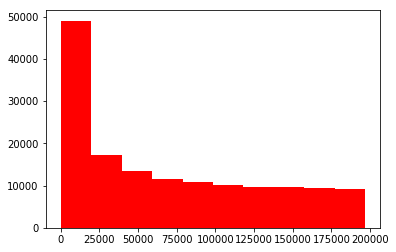

In [17]:
plt.hist(dfCar['name'],orientation='vertical',histtype='bar',color='red')

In [18]:
dfCar['model'].value_counts()
#车型编号 由品牌代号，车型等信息组成，等于是一个重复数据，且组合起来容易有噪声，
#且是类别型数据，类别太多。
#看训练效果，加入去掉比对下

0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
245.0        2
209.0        2
240.0        2
242.0        2
247.0        1
Name: model, Length: 248, dtype: int64

In [19]:
#看下相关性
corrV = dfCar.corr()#相关系数函数.corr()
print(corrV)

                   Unnamed: 0    SaleID      name   regDate     model  \
Unnamed: 0           1.000000  1.000000 -0.002291 -0.001361  0.000659   
SaleID               1.000000  1.000000 -0.002291 -0.001361  0.000659   
name                -0.002291 -0.002291  1.000000 -0.037658  0.016080   
regDate             -0.001361 -0.001361 -0.037658  1.000000  0.148780   
model                0.000659  0.000659  0.016080  0.148780  1.000000   
brand               -0.001734 -0.001734  0.040648  0.033148  0.358765   
bodyType            -0.004407 -0.004407  0.033418  0.100641  0.200231   
fuelType            -0.001989 -0.001989  0.013132  0.259541  0.047106   
gearbox              0.001701  0.001701  0.025810  0.136994  0.018592   
power                0.000875  0.000875  0.000233  0.097442  0.031245   
kilometer           -0.001130 -0.001130 -0.007589 -0.492833 -0.087445   
notRepairedDamage   -0.002923 -0.002923  0.028717 -0.150310 -0.017776   
regionCode          -0.001082 -0.001082  0.005608 -

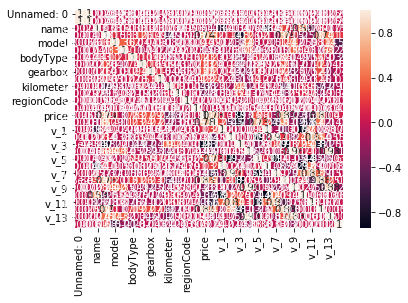

In [20]:
sns.heatmap(corrV,annot=True)#画热力图看下，……也没看出个所以然来，太密了[捂脸]

In [21]:
#看其它列与model的相关性(挑出某列来排序看下)，
print(corrV['model'].sort_values(ascending=False),'\n')#与brand，bodyType等有关

model                1.000000
v_4                  0.426664
v_9                  0.423526
v_13                 0.400001
brand                0.358765
v_8                  0.211149
bodyType             0.200231
regDate              0.148780
price                0.126780
v_12                 0.110157
v_0                  0.091031
fuelType             0.047106
power                0.031245
v_1                  0.019805
gearbox              0.018592
name                 0.016080
v_6                  0.015419
regionCode           0.010241
SaleID               0.000659
Unnamed: 0           0.000659
creatDate           -0.004383
notRepairedDamage   -0.017776
v_5                 -0.019701
v_2                 -0.037685
v_10                -0.058674
v_11                -0.079661
kilometer           -0.087445
v_7                 -0.100753
v_3                 -0.215659
v_14                -0.513733
Name: model, dtype: float64 



In [22]:
#看其它列与价格列的相关性
print(corrV['price'].sort_values(ascending=False),'\n')

price                1.000000
v_8                  0.833014
v_12                 0.808437
v_0                  0.781021
regDate              0.739124
gearbox              0.291780
fuelType             0.269523
v_5                  0.260431
bodyType             0.226216
power                0.216247
v_6                  0.130697
model                0.126780
v_1                  0.126125
v_14                 0.072036
v_13                 0.039736
v_2                  0.033465
regionCode           0.001886
creatDate            0.001864
SaleID               0.000634
Unnamed: 0           0.000634
name                -0.041491
brand               -0.077599
v_7                 -0.146765
v_4                 -0.163521
v_9                 -0.234635
notRepairedDamage   -0.276876
v_10                -0.362220
v_11                -0.367319
kilometer           -0.377463
v_3                 -0.927176
Name: price, dtype: float64 



In [23]:
dfCar['model'].sort_values().unique()#
print(dfCar['model'].sort_values().unique().shape)#(248,)


(248,)


(array([64352., 38406., 16076.,  8836.,  8715.,  3782.,  4622.,  2963.,
         1757.,   490.]),
 array([  0. ,  24.7,  49.4,  74.1,  98.8, 123.5, 148.2, 172.9, 197.6,
        222.3, 247. ]),
 <a list of 10 Patch objects>)

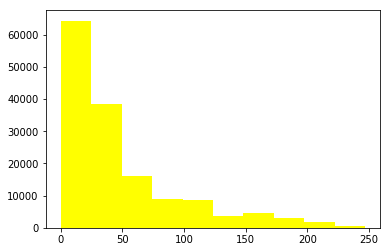

In [24]:
plt.hist(dfCar['model'],orientation='vertical',histtype='bar',color='yellow')

In [25]:
dfCar['brand'].value_counts()

0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      332
2       321
31      318
18      316
36      228
34      227
33      218
23      186
35      180
38       65
39        9
Name: brand, dtype: int64

(array([48056., 33980., 26577., 22473.,  4840.,  4054.,  5855.,  2313.,
         1217.,   634.]),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]),
 <a list of 10 Patch objects>)

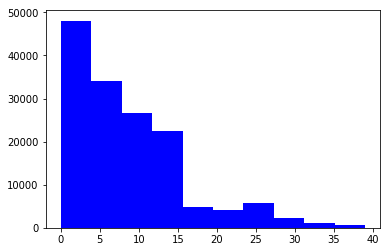

In [26]:
plt.hist(dfCar['brand'],orientation='vertical',histtype='bar',color='blue')

In [27]:
dfCar['brand'].sort_values().unique()#排序看维一，可见是类别数据

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39], dtype=int64)

In [28]:
#转one-hot
dfCar['brand_new'] = dfCar['brand'].apply(getOneHotFn,args=(40,))
dfCar.head()

,Unnamed: 0,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,...,v_9,v_10,v_11,v_12,v_13,v_14,bodyType_new,fuelType_new,regDate_new,brand_new
0,0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,...,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914763,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
1,1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,...,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,...,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,...,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,...,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."


In [29]:
#发动机功率
dfCar['power'].value_counts()

0       12829
75       9593
150      6495
60       6374
140      5963
        ...  
1597        1
1596        1
572         1
316         1
575         1
Name: power, Length: 566, dtype: int64

In [30]:
print(dfCar['power'].sort_values().unique())
print(dfCar['power'].sort_values().unique().shape)
#数值型or类别型？

[    0     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    23    24    25
    26    29    30    31    32    33    34    35    36    37    38    39
    40    41    42    43    44    45    46    47    48    49    50    51
    52    53    54    55    56    57    58    59    60    61    62    63
    64    65    66    67    68    69    70    71    72    73    74    75
    76    77    78    79    80    81    82    83    84    85    86    87
    88    89    90    91    92    93    94    95    96    97    98    99
   100   101   102   103   104   105   106   107   108   109   110   111
   112   113   114   115   116   117   118   119   120   121   122   123
   124   125   126   127   128   129   130   131   132   133   134   135
   136   137   138   139   140   141   142   143   144   145   146   147
   148   149   150   151   152   153   154   155   156   157   158   159
   160   161   162   163   164   165   166   167   

(array([48056., 33980., 26577., 22473.,  4840.,  4054.,  5855.,  2313.,
         1217.,   634.]),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]),
 <a list of 10 Patch objects>)

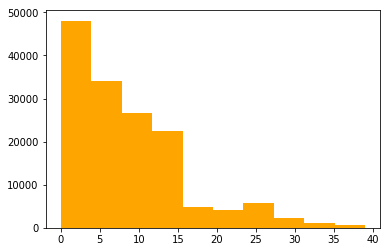

In [31]:
plt.hist(dfCar['brand'],orientation='vertical',histtype='bar',color='orange')

In [32]:
#做一个类别与索引编号对应的字典
powerMatrixOrder = dfCar['power'].sort_values().unique()
powerDict = {v:np.argwhere(powerMatrixOrder==v)[0][0] for v in powerMatrixOrder}
#取矩阵某元素的行列号索引，np.argwhere(矩阵 == 某元素值)
print(powerDict)
print(len(powerDict))
#{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5,…… 17932: 564, 19312: 565
#564
#powerDict[17932]#564

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 23: 21, 24: 22, 25: 23, 26: 24, 29: 25, 30: 26, 31: 27, 32: 28, 33: 29, 34: 30, 35: 31, 36: 32, 37: 33, 38: 34, 39: 35, 40: 36, 41: 37, 42: 38, 43: 39, 44: 40, 45: 41, 46: 42, 47: 43, 48: 44, 49: 45, 50: 46, 51: 47, 52: 48, 53: 49, 54: 50, 55: 51, 56: 52, 57: 53, 58: 54, 59: 55, 60: 56, 61: 57, 62: 58, 63: 59, 64: 60, 65: 61, 66: 62, 67: 63, 68: 64, 69: 65, 70: 66, 71: 67, 72: 68, 73: 69, 74: 70, 75: 71, 76: 72, 77: 73, 78: 74, 79: 75, 80: 76, 81: 77, 82: 78, 83: 79, 84: 80, 85: 81, 86: 82, 87: 83, 88: 84, 89: 85, 90: 86, 91: 87, 92: 88, 93: 89, 94: 90, 95: 91, 96: 92, 97: 93, 98: 94, 99: 95, 100: 96, 101: 97, 102: 98, 103: 99, 104: 100, 105: 101, 106: 102, 107: 103, 108: 104, 109: 105, 110: 106, 111: 107, 112: 108, 113: 109, 114: 110, 115: 111, 116: 112, 117: 113, 118: 114, 119: 115, 120: 116, 121: 117, 122: 118, 123: 119, 124: 120, 125: 

In [33]:
#注意，发动机功率也是类别型数据，长度566，里面分类标号并不是按顺序来看。变OneHot不能传入data，要用data的编号，
#目的是不增加不必要的向量维度。测试数据也照做
#所以函数改下，对应值下标位置置1
def getOneHotFn_power(data,nType):#当前值,传入类型数,#注意pandas要apply的列值，必须在第一参
    
    m = np.zeros([int(nType),])#全0矩阵 一维有多少类就多少列
    #print(m)
    #有值的列置为1
    m[powerDict[int(data)]] = 1
    return m
getOneHotFn_power(17932,566)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [34]:


dfCar['power_new'] = dfCar['power'].apply(getOneHotFn_power,args=(566,))
dfCar.head()
len(dfCar['power_new'][0])#566

566

In [35]:
dfCar['kilometer'].value_counts()#数值型

15.0    96877
12.5    15722
10.0     6459
9.0      5257
8.0      4573
7.0      4084
6.0      3725
5.0      3144
4.0      2718
3.0      2501
2.0      2353
0.5      1840
1.0       746
Name: kilometer, dtype: int64

(array([ 2586.,  4854.,  2718.,  6869.,  4084.,  9830.,  6459.,     0.,
        15722., 96877.]),
 array([ 0.5 ,  1.95,  3.4 ,  4.85,  6.3 ,  7.75,  9.2 , 10.65, 12.1 ,
        13.55, 15.  ]),
 <a list of 10 Patch objects>)

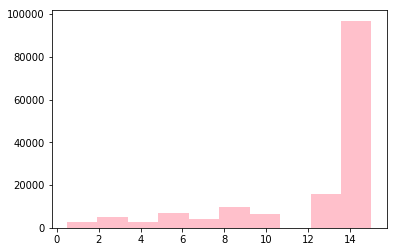

In [36]:
plt.hist(dfCar['kilometer'],orientation='vertical',histtype='bar',color='pink')
#数值总共从15到19差距不大np.log()后变化不大，看横轴跨度和纵轴变化。而价格未做归一化前，本来是从0-100000，特别偏斜，所以要做归一化。

(array([  1840.,      0.,    746.,      0.,   2353.,   2501.,   5862.,
          7809.,  16289., 112599.]),
 array([-0.69314718, -0.35302744, -0.0129077 ,  0.32721203,  0.66733177,
         1.00745151,  1.34757125,  1.68769099,  2.02781072,  2.36793046,
         2.7080502 ]),
 <a list of 10 Patch objects>)

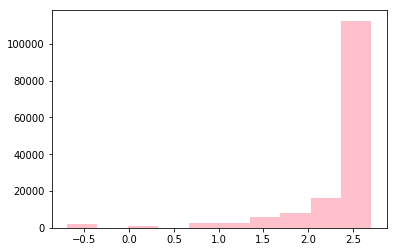

In [37]:
#但数据型还是统一做归一化，使训练加速收敛
dfCar['kilometer_new'] = dfCar['kilometer'].apply(lambda x : np.log(x))
plt.hist(dfCar['kilometer_new'],orientation='vertical',histtype='bar',color='pink')

In [38]:
dfCar['regionCode'].value_counts()

419     369
764     258
125     137
176     136
462     134
       ... 
6414      1
7063      1
4239      1
5931      1
7267      1
Name: regionCode, Length: 7905, dtype: int64

In [39]:
dfCar['regionCode'].sort_values().unique()
dfCar['regionCode'].sort_values().unique().shape
#地区编码分类型，太多类别，对价格没太大影响，不要

(7905,)

In [40]:
dfCar['price'].value_counts()

6.214608    2337
7.313220    2158
7.090077    1922
6.907755    1850
7.824046    1821
            ... 
8.776321       1
9.845858       1
9.247540       1
9.499197       1
5.648974       1
Name: price, Length: 3763, dtype: int64

(array([   56.,   223.,  1508.,  6232., 22319., 35387., 39059., 33184.,
        11123.,   908.]),
 array([ 2.39789527,  3.30939729,  4.22089931,  5.13240133,  6.04390335,
         6.95540537,  7.86690739,  8.77840941,  9.68991143, 10.60141345,
        11.51291546]),
 <a list of 10 Patch objects>)

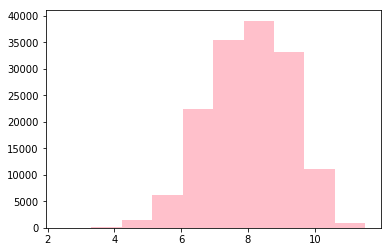

In [41]:
plt.hist(dfCar['price'],orientation='vertical',histtype='bar',color='pink')#价格上次已经做了np.log()归一化

In [42]:
#最后看下v_0到v_14
dfCar['v_0'].value_counts()

45.349115    20
48.087216    16
48.618150    15
47.840357    15
47.568450    15
             ..
43.774218     1
45.925620     1
43.507642     1
42.561630     1
44.408263     1
Name: v_0, Length: 143988, dtype: int64

(array([  137.,  1348.,  2093.,   931.,  5574., 37131., 58977., 37880.,
         5659.,   269.]),
 array([30.45197649, 32.63719667, 34.82241684, 37.00763702, 39.1928572 ,
        41.37807738, 43.56329755, 45.74851773, 47.93373791, 50.11895808,
        52.30417826]),
 <a list of 10 Patch objects>)

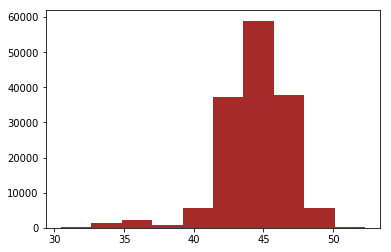

In [43]:
#看图较好可留的特征：0,3,4，8，11,12,13,14
plt.hist(dfCar['v_0'],orientation='vertical',histtype='bar',color='brown')

In [44]:
#分布不好的展示如下

(array([55935., 28428.,    92.,   503.,  1978.,  4686., 16925., 31133.,
         9957.,   362.]),
 array([-4.2955889 , -3.13399918, -1.97240945, -0.81081972,  0.35077001,
         1.51235974,  2.67394946,  3.83553919,  4.99712892,  6.15871865,
         7.32030837]),
 <a list of 10 Patch objects>)

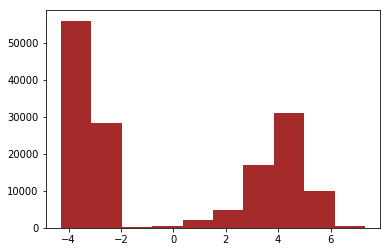

In [45]:
plt.hist(dfCar['v_1'],orientation='vertical',histtype='bar',color='brown')

(array([2.90400e+03, 1.09005e+05, 3.35830e+04, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 4.20000e+01, 3.51600e+03, 9.48000e+02]),
 array([-4.47067143, -2.12005464,  0.23056216,  2.58117895,  4.93179574,
         7.28241253,  9.63302933, 11.98364612, 14.33426291, 16.68487971,
        19.0354965 ]),
 <a list of 10 Patch objects>)

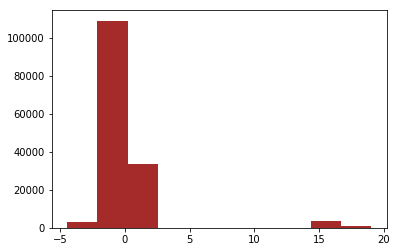

In [46]:
plt.hist(dfCar['v_2'],orientation='vertical',histtype='bar',color='brown')
#v2分布不均，不要

In [47]:
#plt.hist(dfCar['v_5'],orientation='vertical',histtype='bar',color='brown')
#分布不均，不要
#plt.hist(dfCar['v_6'],orientation='vertical',histtype='bar',color='brown')
#plt.hist(dfCar['v_7'],orientation='vertical',histtype='bar',color='brown')
#plt.hist(dfCar['v_9'],orientation='vertical',histtype='bar',color='brown')
#plt.hist(dfCar['v_10'],orientation='vertical',histtype='bar',color='brown')
#plt.hist(dfCar['v_11'],orientation='vertical',histtype='bar',color='brown')

In [48]:
#将几个数据值型数据归一化到0-1之间 np.log()
#v_0,3,4，8，12,13,14 【选这些看不见的特征，可以参考上面与price的相关性来选，选相关大的，包括负相关】
dfCar['v_0_new'] = dfCar['v_0'].apply(lambda x : np.log(x))
#dfCar['v_3_new'] = dfCar['v_3'].apply(lambda x : np.log(x))#有负数
#dfCar['v_4_new'] = dfCar['v_4'].apply(lambda x : np.log(x))#有负数
dfCar['v_8_new'] = dfCar['v_8'].apply(lambda x : x*10)#本来就很小,所以*10变到0-1之间
#dfCar['v_12_new'] = dfCar['v_12'].apply(lambda x : np.log(x))#有负数
#dfCar['v_13_new'] = dfCar['v_13'].apply(lambda x : np.log(x))#有负数
#dfCar['v_14_new'] = dfCar['v_14'].apply(lambda x : np.log(x))#有负数

In [49]:
#plt.hist(dfCar['v_14'],orientation='vertical',histtype='bar',color='pink')
#v_3有负数，np.log报错

(array([132870.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  17129.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

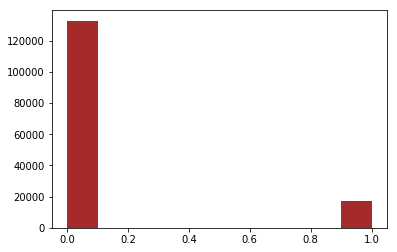

In [50]:
plt.hist(dfCar['notRepairedDamage'],orientation='vertical',histtype='bar',color='brown')
#正负例差太多，后面可考虑复制增加正例，
#gearbox也一样，差不多

In [51]:
#seller,offerType已经删除，过于偏斜。测试数据做同样处理。
#plt.hist(dfCar['offerType'],orientation='vertical',histtype='bar',color='brown')
#temp = dfCar["regDate_new"]
#print(temp)

In [52]:
#选特征
readyFeatureCols = ["SaleID","regDate_new","brand_new","bodyType_new","fuelType_new","power_new","gearbox","kilometer_new","notRepairedDamage","v_0_new","v_8_new","v_3","v_4","v_12","v_13","v_14","price"]
dfCarReady = pd.DataFrame(dfCar,columns = readyFeatureCols)
dfCarReady.head()

,SaleID,regDate_new,brand_new,bodyType_new,fuelType_new,power_new,gearbox,kilometer_new,notRepairedDamage,v_0_new,v_8_new,v_3,v_4,v_12,v_13,v_14,price
0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,2.525729,0.0,3.769487,0.228164,2.159744,1.143786,-2.420821,0.795292,0.914763,7.522941
1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,2.708050,0.0,3.813423,0.265974,1.380657,-1.422165,-1.030483,-1.722674,0.245522,8.188689
2,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,2.525729,0.0,3.828171,0.621728,-0.998467,-0.996911,1.565330,-0.832687,-0.229963,8.735847
3,3,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0,2.708050,0.0,3.821824,0.333945,0.883600,-2.228079,-0.501868,-2.438353,-0.478699,7.783224
4,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,1.609438,0.0,3.792868,0.788194,-1.571239,2.246088,0.931110,2.834518,1.923482,8.556414


In [53]:
dfCarReady.shape

(149999, 17)

In [54]:
#dfCarReady.to_csv("data//readyFeatures.csv")
#【注意，存成文件的时候数据格式会乱掉，很麻烦，所以，最好特征处理和模型搭建在同一文件中。】

In [55]:
#===以下get_dummies是一种将类别数据变onehot编码的形式，可看下=
'''
dfOhTest = pd.DataFrame([  
            ['green' , '1'],   
            ['red'   , '2'],   
            ['blue'  , '3']]) 
dfOhTest
'''
#pd.get_dummies(dfOhTest[0])#给第0列变成onehot

"\ndfOhTest = pd.DataFrame([  \n            ['green' , '1'],   \n            ['red'   , '2'],   \n            ['blue'  , '3']]) \ndfOhTest\n"

In [56]:
#把df数据拼成matrix矩阵，用于送入模型做运算
dfDatas = dfCarReady
dfDatas.head(3)

,SaleID,regDate_new,brand_new,bodyType_new,fuelType_new,power_new,gearbox,kilometer_new,notRepairedDamage,v_0_new,v_8_new,v_3,v_4,v_12,v_13,v_14,price
0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,2.525729,0.0,3.769487,0.228164,2.159744,1.143786,-2.420821,0.795292,0.914763,7.522941
1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,2.708050,0.0,3.813423,0.265974,1.380657,-1.422165,-1.030483,-1.722674,0.245522,8.188689
2,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,2.525729,0.0,3.828171,0.621728,-0.998467,-0.996911,1.565330,-0.832687,-0.229963,8.735847


# TASK4 建模调参

In [57]:
from sklearn.linear_model import LinearRegression,SGDRegressor, Ridge#【线性回归模型,SGD回归，岭回归】
from sklearn.linear_model import LogisticRegression#【逻辑回归模型】
from sklearn.model_selection import train_test_split#【数据集划分】
from sklearn.model_selection import GridSearchCV#【网络调参】
from sklearn.metrics import accuracy_score#【模型评估】
from sklearn.metrics import mean_squared_error,mean_absolute_error#【均方误差，平均绝对误差】
from sklearn.metrics import accuracy_score,precision_score,recall_score#【准确率、精确率、召回率】
from sklearn.externals import joblib#【保存模型】

In [58]:
#===把df数据拼成matrix矩阵，用于送入模型做运算===
label = dfDatas['price'].tolist()
print(len(label))#149999条
print(label[:3])#[7.52294091807237, 8.188689124444199, 8.735846677457582
#单列非One-hot数据组合成矩阵m1 as_matrix() df变矩阵
data_m1 = dfDatas[['gearbox','kilometer_new','notRepairedDamage','v_0_new','v_8_new','v_3','v_4','v_12','v_13','v_14']].as_matrix()
print(data_m1.shape)#(149999条, 10列)
#onehot数据 取出变列表，拼到一个矩阵里
data_m2 = dfDatas['brand_new'].tolist()
print(len(data_m2))#149999
data_m3 = dfDatas['bodyType_new'].tolist()
print(len(data_m3))#149999
data_m4 = dfDatas['fuelType_new'].tolist()
print(len(data_m4))#149999
data_m5 = dfDatas['power_new'].tolist()
print(len(data_m5))#149999
data_m6 = dfDatas['regDate_new'].tolist()
print(len(data_m6))#149999
print(len(data_m2[0]))#40
print(len(data_m3[0]))#8
print(len(data_m4[0]))#7
print(len(data_m5[0]))#566#这个太长了，需要降维，也可拼完整体降
print(len(data_m6[0]))#25
#把m1,2,3,4,5,6拼起，总矩阵数据应该是(149999,10+40+8+7+566+25) 即(149999,656)
dataAll = np.concatenate([data_m1,data_m2,data_m3,data_m4,data_m5,data_m6],axis=1)#内层水平拼起，数据总条数维度不变
dataAll.shape#(149999, 656)

149999
[7.52294091807237, 8.188689124444199, 8.735846677457582]
(149999, 10)
149999
149999
149999
149999
149999
40
8
7
566
25


G:\ph\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


(149999, 656)

In [59]:
#label处理成数组矩阵格式
label_new = np.array(label)
label_new.shape

(149999,)

In [60]:
#给dataAll降维
pca = PCA(n_components=300)#等于是建一个300列矩阵，去fit dataAll 相乘机制 使其维度变形
dataAll_new = pca.fit_transform(dataAll)
dataAll_new.shape#(149999, 300)  由656降到了300

(149999, 300)

In [61]:
#划分数据集
x_train,x_test,y_train,y_test= train_test_split(dataAll_new,label_new,train_size=0.8,test_size = 0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(119999, 300)
(30000, 300)
(119999,)
(30000,)


array([8.89562963, 6.68461173, 8.49699048, 8.11671562, 6.39692966,
       8.80986281, 9.10497986, 8.61232154, 7.34601021, 8.67419694])

In [90]:
#回归问题，1）先用线性回归
carModel = LinearRegression()
carModel.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [100]:
yPred = carModel.predict(x_test)
mse1 = mean_squared_error(y_test,yPred)
mae1 = mean_absolute_error(y_test,yPred)
print("线性回归均方误差：",mse1)#0.09062236350507456
print("线性回归平均绝对误差",mae1)#0.18909076136714806

线性回归均方误差： 0.09062236350507456
线性回归平均绝对误差 0.18909076136714806


In [103]:
#2）SGD回归
sgdCarModel = SGDRegressor()
sgdCarModel.fit(x_train,y_train)
yPred_sgd = sgdCarModel.predict(x_test)
mse2 = mean_squared_error(y_test,yPred_sgd)
mae2 = mean_absolute_error(y_test,yPred_sgd)
print("SGD回归均方误差：",mse2)#0.09389636557515796
print("SGD回归平均绝对误差",mae2)#0.19896983842142513

G:\ph\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGD回归均方误差： 0.09389636557515796
SGD回归平均绝对误差 0.19896983842142513


In [104]:
#2）岭回归
rdCarModel = Ridge(alpha=0.01)
rdCarModel.fit(x_train,y_train)
yPred_rd = rdCarModel.predict(x_test)
mse3 = mean_squared_error(y_test,yPred_rd)
mae3 = mean_absolute_error(y_test,yPred_rd)
print("岭回归均方误差：",mse3)#0.0906222835039978
print("岭回归平均绝对误差",mae3)#0.18909075772757297

岭回归均方误差： 0.0906222835039978
岭回归平均绝对误差 0.18909075772757297


In [109]:
#使用网格调参找最优参数Ridge 配合GridSearch
alpha = np.logspace(-3,2,10)#生成一组学习率超参数，10的-3次方到10的2次方的等差数列
print(alpha)#[1.00000000e-03 3.59381366e-03 
rdCarModel2 = GridSearchCV(Ridge(),param_grid = {'alpha':alpha},cv =5)#CV交叉验证参数,默认3
rdCarModel2.fit(x_train,y_train)
print("最优学习率：",rdCarModel2.best_params_)#打印最好的学习率{'alpha': 7.742636826811277}


[1.00000000e-03 3.59381366e-03 1.29154967e-02 4.64158883e-02
 1.66810054e-01 5.99484250e-01 2.15443469e+00 7.74263683e+00
 2.78255940e+01 1.00000000e+02]


{'alpha': 7.742636826811277}

In [111]:
#经过网格调参后会自动用最优的参数来训练模型，此时的模型效果是最好的
#看下效果
yPred_rd_grid = rdCarModel2.predict(x_test)
mse4 = mean_squared_error(y_test,yPred_rd_grid)
mae4 = mean_absolute_error(y_test,yPred_rd_grid)
print("岭回归加网格调参模型 均方误差：",mse4)
#0.0906222835039978之前对比
#0.09059577478735015
print("岭回归加网格调参模型 平均绝对误差",mae4)
#0.18909075772757297之前对比
#0.18909075772757297

岭回归加网格调参模型 均方误差： 0.09059577478735015
岭回归加网格调参模型 平均绝对误差 0.18918030581845327


In [114]:
#保存模型，方法很多，此处用joblib.dump(model,"model.pkl")#存成pkl，恢复模型joblib.load(mode.pkl)
joblib.dump(rdCarModel2,"rsModel//rdCarModelGrid.pkl")
joblib.dump(rdCarModel,"rsModel//rdCarModel.pkl")
joblib.dump(sgdCarModel,"rsModel//sgdCarModel.pkl")
joblib.dump(carModel,"rsModel//lineRCarModel.pkl")

['rsModel//lineRCarModel.pkl']

In [115]:
#试下load模型
newModel = joblib.load("rsModel//rdCarModelGrid.pkl")
yPredNew = newModel.predict(x_test)
mseNew = mean_squared_error(y_test,yPredNew)
maeNew = mean_absolute_error(y_test,yPredNew)
print(mseNew,"\n",maeNew)#0.09059577478735015 #0.18918030581845327

0.09059577478735015 
 0.18918030581845327


In [106]:
#==其它：数据标准化可用函数
#from sklearn.preprocessing import StandardScaler
#ss_X = StandardScaler()
#X_train = ss_X.fit_transform(X_train)

# task5 模型融合

In [62]:
#读取上一任务保存的三个模型整合在一起
model_1 = joblib.load('rsModel//rdCarModelGrid.pkl')#岭回归
model_2 = joblib.load('rsModel//sgdCarModel.pkl')#SGD回归
model_3 = joblib.load('rsModel//lineRCarModel.pkl')#线性回归

In [64]:
yPred_1 = model_1.predict(x_test)
mae_1 = mean_absolute_error(y_test,yPred_1)
mse_1 = mean_squared_error(y_test,yPred_1)
yPred_2 = model_2.predict(x_test)
mae_2 = mean_absolute_error(y_test,yPred_2)
mse_2 = mean_squared_error(y_test,yPred_2)
yPred_3 = model_3.predict(x_test)
mae_3 = mean_absolute_error(y_test,yPred_3)
mse_3 = mean_squared_error(y_test,yPred_3)
print("模型1 岭回归 mae:",mae_1)
print("模型2 SGD回归 mae:",mae_2)#随机梯度下降(SGD)
print("模型3 线性回归 mae:",mae_3)
print("模型1 岭回归 mse:",mse_1)
print("模型2 SGD回归 mse:",mse_2)
print("模型3 线性回归 mse:",mse_3)

模型1 岭回归 mae: 0.18918927514642028
模型2 SGD回归 mae: 0.19896934708438438
模型3 线性回归 mae: 0.18910121869597163
模型1 岭回归 mse: 0.09060473422668329
模型2 SGD回归 mse: 0.0938967845892798
模型3 线性回归 mse: 0.09063513382245392


In [73]:
#==融合方法一 stacking 模型堆叠，把上同三个模型层起，再过一个模型（此模型易用简单的，不要太复杂，不然容易过拟合）=
#concat上面三组预测结果当做新特征输入到总模型，真实值是它的labels,再次预测评估
new_x_train = pd.concat([pd.Series(yPred_1),pd.Series(yPred_2),pd.Series(yPred_3)],axis=1).values#从axis=1外维数据条数层面拼接，不是数据自身的0内维拼接
print(new_x_train[:10])
print(new_x_train.shape)#新features
print(y_test.shape)#真实标签数据
print(y_train.shape)

[[6.84564706 6.83304385 6.84624255]
 [8.81972855 8.81382188 8.81892313]
 [6.99149168 6.98702617 6.99138808]
 [9.00195247 9.00515181 9.00056618]
 [6.72219572 6.6729465  6.72545636]
 [9.35188278 9.41417913 9.34728554]
 [7.04186306 7.00022246 7.04508469]
 [9.92128669 9.91149257 9.91664582]
 [9.2263992  9.166701   9.23378547]
 [6.33481979 6.37714893 6.33269953]]
(30000, 3)
(30000,)
(119999,)


In [ ]:
#将new_x_train y_test拆分为训练集测试集

In [81]:
#创建stack的总模型
stackModel = LinearRegression()
#训练
stackModel.fit(new_x_train,y_test)
#预测,给用新特征训好的加强版模型
yPred_stack = stackModel.predict(new_x_train)
#评估
mse_stack = mean_squared_error(y_test,yPred_stack)#前真，后预测
mae_stack = mean_absolute_error(y_test,yPred_stack)#前真，后预测
print("stacking融合模型MAE:",mae_stack)
print("stacking融合模型MSE:",mse_stack)

stacking融合模型MAE: 0.18909313183206142
stacking融合模型MSE: 0.0905772285214188
